<center><h1> Case Study 4</h1></center>
<center><h3> Week 4 (out of 5)</h3></center>

**Author(s):**
1. Belicia Rodriguez (belicia.rodriguez@emory.edu)
 
**Data Source**: http://fmwww.bc.edu/ec-p/data/wooldridge/datasets.list.html
 
**Book**: [Introductory Econometrics: A Modern Approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf) by Jeffrey Wooldridge

**Data**:

```
INFMRT.DTA

year      infmort   afdcprt   popul     pcinc     physic    afdcper   d90      
lpcinc    lphysic   DC        lpopul    

  Obs:   102

  1. year                     1987 or 1990
  2. infmort                  infant mortality rate
  3. afdcprt                  AFDC participation, 1000s
  4. popul                    population, 1000s
  5. pcinc                    per capita income
  6. physic                   Drs. per 100,000 civilian pop.
  7. afdcper                  percent on AFDC
  8. d90                      =1 if year == 1990
  9. lpcinc                   log(pcinc)
 10. lphysic                  log(physic)
 11. DC                       =1 for Washington DC
 12. lpopul                   log(popul)
 ```

1. [5 points] Download the relevant data set from the data source above, and create two local copies as follows: `infmrt_87` and `infmrt_90` contain the sub-samples of observations corresponding to years 1987 and 1990 respectively.

In [1]:
import pandas as pd
import numpy as np
import patsy
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# import dataset
infmrt = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/infmrt.dta')

# split the panel data
infmrt_87 = infmrt.loc[infmrt['year'] == 1987.0]
infmrt_90 = infmrt.loc[infmrt['year'] == 1990.0]

# pre-processing: demean the variable 'popul'
infmrt_87['popul'] = infmrt_87['popul'] - infmrt_87['popul'].mean(skipna = True)
infmrt_90['popul'] = infmrt_90['popul'] - infmrt_90['popul'].mean(skipna = True)

# create design matrix with specification
X_87 = patsy.dmatrix('-1 + lpcinc + lphysic + popul', data=infmrt_87, return_type='dataframe')
X_90 = patsy.dmatrix('-1 + lpcinc + lphysic + popul', data=infmrt_90, return_type='dataframe')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


2. [30 points] Using the `pcinc`, `physic`, and the `popul` features, please proceed to implement the $K$-Means Algorithm using each of the previously created data sets where $K$, the number of clusters, is chosen by the elbow method (you are expected to provide a visualization for each case). **Hint**: As discussed in the lectures, taking natural logarithm is just one possible pre-processing transformation, you can also apply classical standardization. Please use the 42 seed and at least 25 initial random starting points.

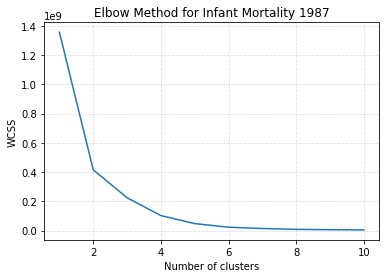

In [2]:
# run K-Means Algorithm on infmrt_87

# elbow method: choose value of K
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=25, random_state=42)
    kmeans.fit(X_87)
    elbow.append(kmeans.inertia_)
    
plt.plot(range(1, 11), elbow)
plt.grid(alpha=0.4,linestyle='--') #Adding a grid
plt.title('Elbow Method for Infant Mortality 1987')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform k-means clustering
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=25, random_state=42)
pred_y = kmeans.fit_predict(X_87)

# store kmeans_labels
labels_87 = kmeans.labels_

By viewing the graph above, the diminishing returns for K happen after number of clusters equals 3. Therefore, I will select K = 3 for K-Means clustering.

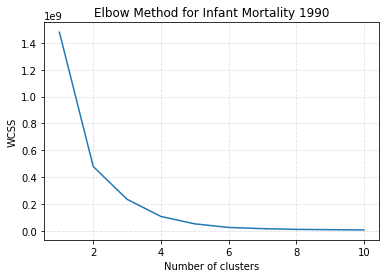

In [3]:
# run K-Means Algorithm on infmrt_90

# elbow method: choose value of K
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=25, random_state=42)
    kmeans.fit(X_90)
    elbow.append(kmeans.inertia_)
    
plt.plot(range(1, 11), elbow)
plt.grid(alpha=0.4,linestyle='--') #Adding a grid
plt.title('Elbow Method for Infant Mortality 1990')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform k-means clustering
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=25, random_state=42)
pred_y = kmeans.fit_predict(X_87)

# store kmeans_labels
labels_90 = kmeans.labels_

3. [30 points] Create the relevant dummy variables that identify the class your $K$-Means clustering algorithm identifies each observation to belong to in each data set, i.e., if for example you found out that $K=3$ for `infmrt_87`, then create new variables `d1`, `d2`, and `d3` in `infmrt_87` where `dj` equals 1 if an observation belong to class `j` as identified by your clustering algorithm, and zero otherwise. Do the same for the `infmrt_90`.

In [4]:
# create new classification dummy variables for each dataset
infmrt_87['d'] = labels_87 + 1
infmrt_87 = pd.get_dummies(infmrt_87, columns = ['d'])

infmrt_90['d'] = labels_90 + 1
infmrt_90 = pd.get_dummies(infmrt_90, columns = ['d'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


4. [30 points] Using the newly created dummy variables in part 3 above (or otherwise) create a table where each row represents a class category (as found by your $K$-Means clustering algorithm), and two columns one for `infmort` and `afdcprt`. Please report within each cell the corresponding average of these two variables within the observations belonging to each cluster. Do this for both data sets.

In [5]:
infmrt_87.columns[-3:]

Index(['d_1', 'd_2', 'd_3'], dtype='object')

In [7]:
# create indexes
d_index = infmrt_87.columns[-3:]

# initalize a dataframe
table_87 = pd.DataFrame(index = d_index, columns = ['infmort_avg', 'afdcprt_avg'])

# loop through variables in infmrt_87
for i in d_index:
    # average infmort observations in each cluster
    d_mean = (infmrt_87.infmort.loc[infmrt_87[i] == 1]).mean()
    round_d_mean = round(d_mean, 1)
    table_87['infmort_avg'][i] = round_d_mean

    # average afdcprt observations in each cluster
    d_mean = (infmrt_87.afdcprt.loc[infmrt_87[i] == 1]).mean()
    round_d_mean = round(d_mean, 1)
    table_87['afdcprt_avg'][i] = round_d_mean

# display table for results
print('Average By Cluster For infmrt_87 Dataset')
table_87

Average By Cluster For infmrt_87 Dataset


,infmort_avg,afdcprt_avg
d_1,10.1,108.2
d_2,9,1708
d_3,10.3,619.4


In [8]:
# initalize a dataframe
table_90 = pd.DataFrame(index = d_index, columns = ['infmort_avg', 'afdcprt_avg'])

# loop through variables in infmrt_87
for i in d_index:
    # average infmort observations in each cluster
    d_mean = (infmrt_90.infmort.loc[infmrt_90[i] == 1]).mean()
    round_d_mean = round(d_mean, 1)
    table_90['infmort_avg'][i] = round_d_mean

    # average afdcprt observations in each cluster
    d_mean = (infmrt_90.afdcprt.loc[infmrt_90[i] == 1]).mean()
    round_d_mean = round(d_mean, 1)
    table_90['afdcprt_avg'][i] = round_d_mean

# display table for results
print('Average By Cluster For infmrt_90 Dataset')
table_90

Average By Cluster For infmrt_90 Dataset


,infmort_avg,afdcprt_avg
d_1,9.2,122.4
d_2,7.9,2023
d_3,9.7,667.1


5. [5 points] Please comment on the two tables you've just created in part 4 above. Is there any systematic relationship between infmort and afdcprt across classes and between years?

The classes in the 1987 and 1990 tables both have similar averages. For example, class three in the 1987 and 1990 tables across both variables have similar averages, whereas class three and class two or class three and class one between both year tables are not very similar. Also, between both tables, for the infmort variable, d_2 has the smallest average across the three classes with d_1 in the middle and d_3 as the largest average. For afdcprt, the largest class average across both tables comes from the d_2 class with d_3 in the middle and d_1 having the smallest average.

**Comment:** Everything is correct. You may want to create a function when you know you will repeat a process (for instance create the graphs with the k-means or the tables).